# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
city_data = []
city = cities[0]
# Create endpoint URL with each city
city_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
#print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
#record_count += 1

    # Run an API request for each of the cities
try:
        # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    city_lat = city_weather['coord']['lat']
    city_lng = city_weather['coord']['lon']
    city_max_temp = city_weather['main']['temp_max']
    city_humidity = city_weather['main']['humidity']
    city_clouds = city_weather['clouds']['all']
    city_wind = city_weather['wind']['speed']
    city_country = city_weather['sys']['country']
    city_date = city_weather['dt']

        # Append the City information into city_data list
    city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
except:
    print("City not found. Skipping...")
    pass
city_data

[{'City': 'westerland',
  'Lat': 54.9079,
  'Lng': 8.3033,
  'Max Temp': 285.16,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'DE',
  'Date': 1728525083}]

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | westerland
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port moresby
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | charlestown
Processing Record 7 of Set 1 | tortoli
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | xai-xai
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | vardenis
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | aras-asan
Processing Record 19 of Set 1 | tugulym
Processing Record 20 of Set 1 | timbiqui
Processing Record 21 of Set 1 | victorica
Processing Record 22 of Set 1 | ta`u
Processing Record 23 of Set 1 | g

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westerland,54.9079,8.3033,285.16,94,100,1.54,DE,1728525248
1,tazovsky,67.4667,78.7000,268.68,81,100,10.54,RU,1728525250
2,west island,-12.1568,96.8225,300.14,74,99,7.20,CC,1728525251
3,port moresby,-9.4431,147.1797,303.83,66,40,1.54,PG,1728525252
4,ribeira grande,38.5167,-28.7000,294.69,88,2,1.79,PT,1728525253


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westerland,54.9079,8.3033,285.16,94,100,1.54,DE,1728525248
1,tazovsky,67.4667,78.7000,268.68,81,100,10.54,RU,1728525250
2,west island,-12.1568,96.8225,300.14,74,99,7.20,CC,1728525251
3,port moresby,-9.4431,147.1797,303.83,66,40,1.54,PG,1728525252
4,ribeira grande,38.5167,-28.7000,294.69,88,2,1.79,PT,1728525253


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

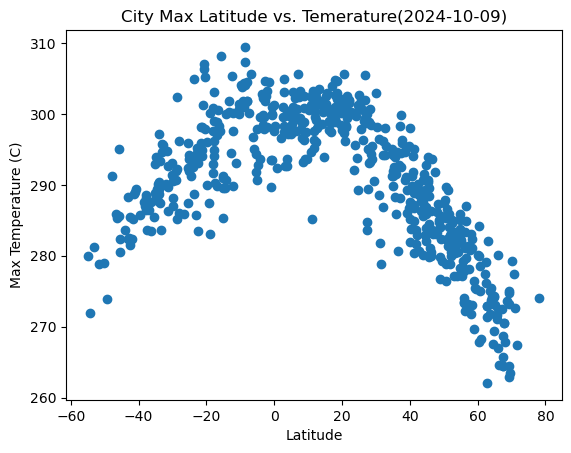

In [59]:
from datetime import datetime
#datetime.utcfromtimestamp(unix_time_value)
# Build scatter plot for latitude vs. temperature
xcoors = city_data_df['Lat']
ycoors = city_data_df['Max Temp']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temerature({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

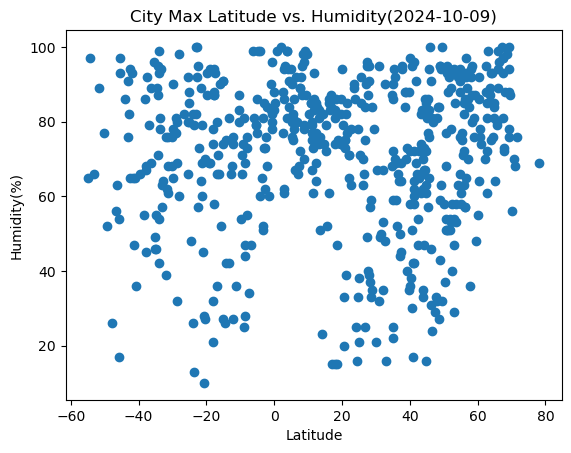

In [61]:
# Build the scatter plots for latitude vs. humidity
xcoors = city_data_df['Lat']
ycoors = city_data_df['Humidity']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Max Latitude vs. Humidity({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

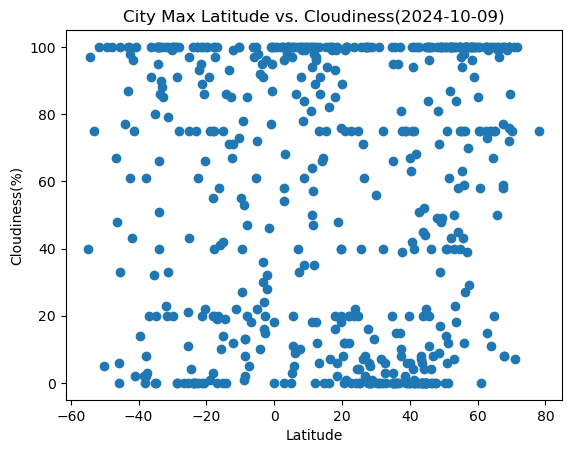

In [63]:
# Build the scatter plots for latitude vs. cloudiness
xcoors = city_data_df['Lat']
ycoors = city_data_df['Cloudiness']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Max Latitude vs. Cloudiness({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

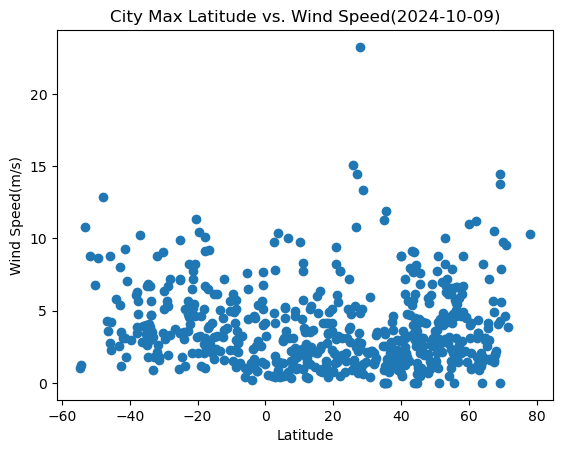

In [65]:
# Build the scatter plots for latitude vs. wind speed
xcoors = city_data_df['Lat']
ycoors = city_data_df['Wind Speed']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title(f"City Max Latitude vs. Wind Speed({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def LinReg(xs,ys):
    slope, intercept, rvalue, pvalue, stderr = linregress(xs,ys)
    linregs = [slope,intercept,rvalue,pvalue,stderr]
    return linregs

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westerland,54.9079,8.3033,285.16,94,100,1.54,DE,1728525248
1,tazovsky,67.4667,78.7000,268.68,81,100,10.54,RU,1728525250
4,ribeira grande,38.5167,-28.7000,294.69,88,2,1.79,PT,1728525253
6,tortoli,39.9256,9.6572,298.05,36,0,8.75,IT,1728525256
8,bethel,41.3712,-73.4140,284.88,64,75,2.06,US,1728525258


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,300.14,74,99,7.20,CC,1728525251
3,port moresby,-9.4431,147.1797,303.83,66,40,1.54,PG,1728525252
5,charlestown,-32.9500,151.6667,295.65,64,85,1.79,AU,1728525254
7,dunedin,-45.8742,170.5036,285.57,54,6,2.76,NZ,1728525257
9,hermanus,-34.4187,19.2345,289.12,95,100,3.35,ZA,1728525259


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7789256753963038


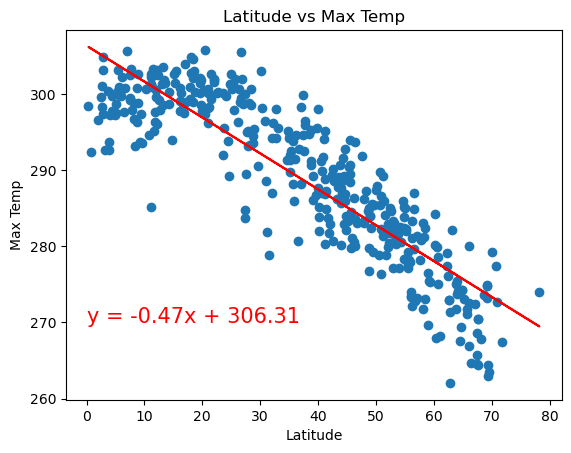

In [89]:
# Linear regression on Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Max Temp']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(xcoors,regeq,color = 'r')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.5425899721158423


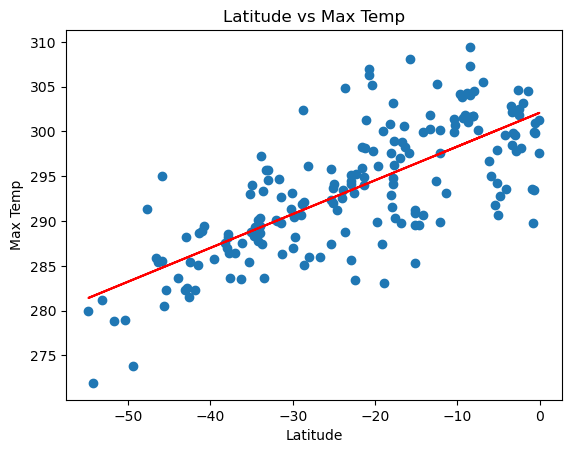

In [91]:
# Linear regression on Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Max Temp']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


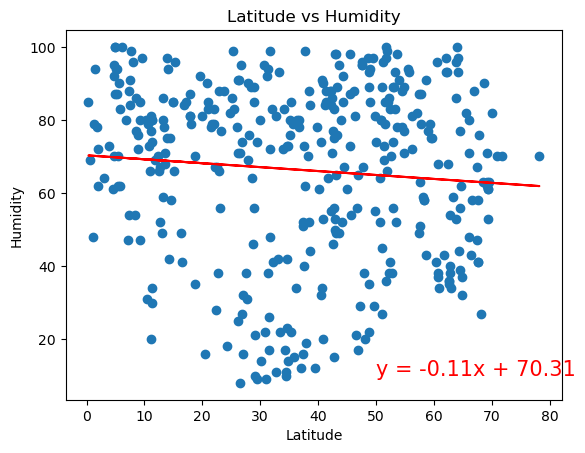

In [17]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Humidity']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.00014367159540169783


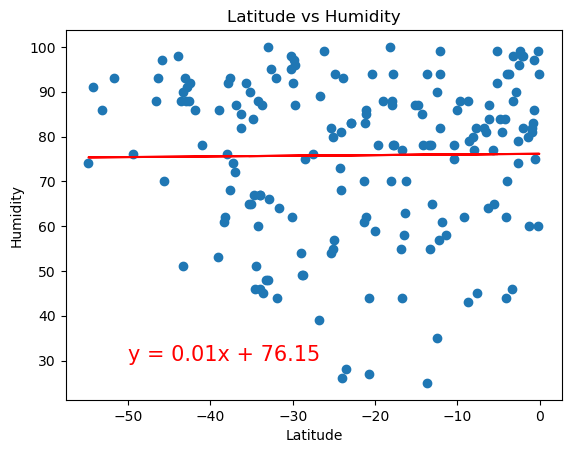

In [23]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Humidity']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


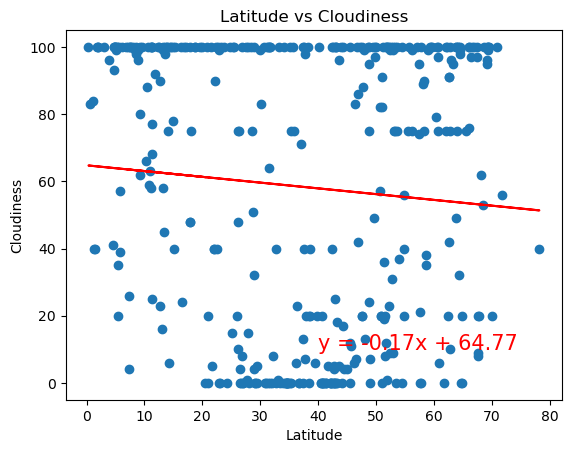

In [19]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Cloudiness']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.018616831531634456


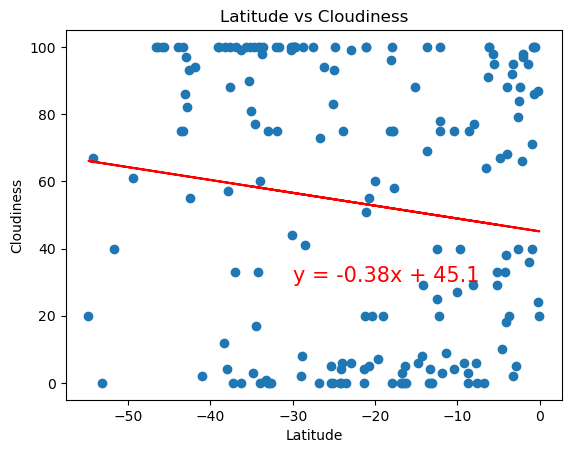

In [20]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Cloudiness']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


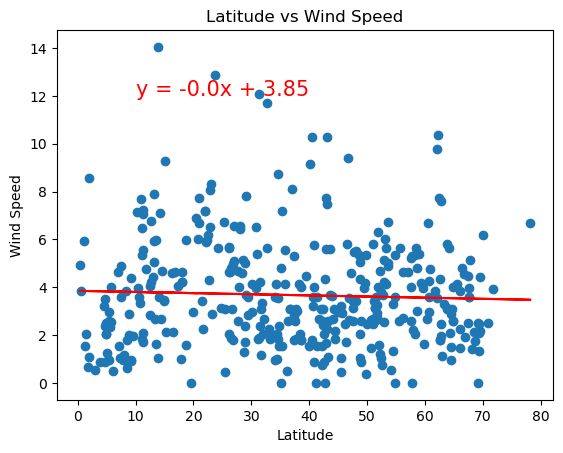

In [21]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Wind Speed']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(xcoors,regeq)
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.06495869418886388


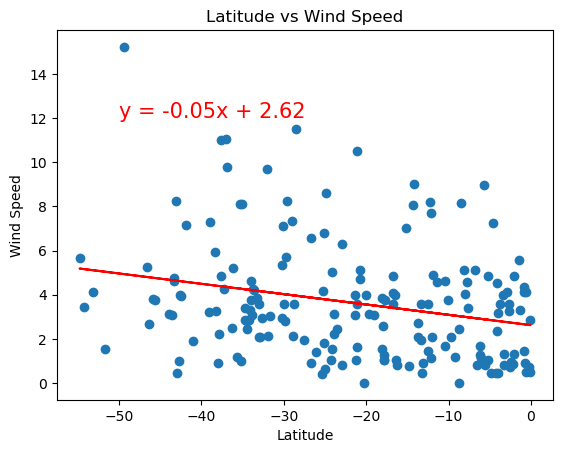

In [22]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Wind Speed']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(xcoors,regeq)
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE